In [ ]:
import pandas as pd
df = pd.read_csv("https://dlsun.github.io/pods/data/bordeaux.csv",
index_col="year")
df.head()

In [ ]:
df.info()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig1 = px.scatter(df[~df["price"].isnull()],
x="win", y="summer", color="price")
fig2 = px.scatter(df[df["price"].isnull()],
x="win", y="summer", symbol_sequence=["circle-open"])
go.Figure(data=fig1.data + fig2.data, layout=fig1.layout)


In [ ]:
df_train = df.loc[:1980].copy()
df_test = df.loc[1981:].copy()

In [ ]:
X_train = df_train[["win", "summer"]]
y_train = df_train["price"]


In [ ]:
# Standardize the features.
X_train_mean = X_train.mean()
X_train_sd = X_train.std()
X_train_scaled = (X_train - X_train_mean) / X_train_sd


In [ ]:
X_test = df_test[["win", "summer"]]
X_test_scaled = (X_test - X_train_mean) / X_train_sd
X_test_scaled


### Using scikit-learn

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
# Scale the test data using a scaler that was fit to the training data!
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X=X_train_scaled, y=y_train)
model.predict(X=X_test_scaled)


In [ ]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(
StandardScaler(),
KNeighborsRegressor(n_neighbors=5))

In [ ]:
pipeline.fit(X=X_train, y=y_train)
pipeline.predict(X=X_test)

### Geeksforgeeks

In [ ]:
import numpy as np
from collections import Counter

In [ ]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

In [ ]:
def knn_predict(training_data, training_labels, test_point, k):
    distances = []
    for i in range(len(training_data)):
        dist = euclidean_distance(test_point, training_data[i])
        distances.append((dist, training_labels[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    return Counter(k_nearest_labels).most_common(1)[0][0]

In [ ]:
Counter([1,2,3,4,5,1,1,2,1,3]).most_common(1)[0][0]

### NEW

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification

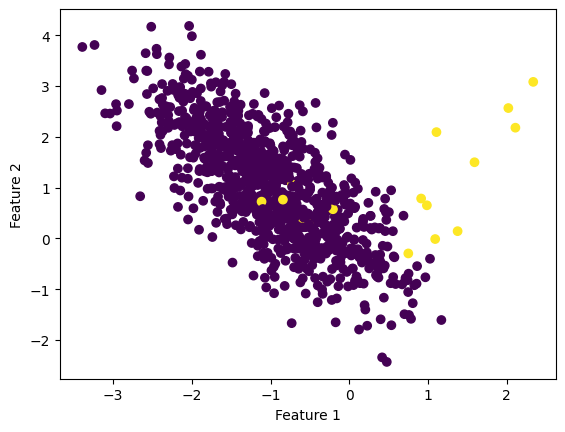

In [ ]:
X,y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1,
                          weights=[0.99], random_state=0)


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score
from matplotlib import pyplot

In [46]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
dummy_model_prob = [0 for _ in range(len(y_test))]